# https://machinelearningmastery.com/curve-fitting-with-python/

**Sure! Here's a simplified version:**

"Curve fitting is a way to find the best parameters for a function that matches a set of data points as closely as possible.

Unlike supervised learning, where the model learns the function on its own, in curve fitting, you need to choose the function type in advance. This function could be a straight line (like in linear regression) or a curved one (like in polynomial regression), or other shapes.

The flexibility in curve fitting allows you to decide the form of the curve, and an optimization process helps find the best parameters for that chosen function."

**Here's a simplified version of that explanation:**

"Curve fitting is a way to find a line or curve that best matches a set of data points.

Imagine plotting your data on a 2D graph, where the x-axis is the input (independent variable) and the y-axis is the output (dependent variable). We may not know the exact formula that connects the input and output, but we think we can approximate it with a known function.

First, we choose the type of function (like a straight line or curve) to fit the data. Then, we adjust the function's parameters to minimize the difference (error) between the predicted and actual outputs.

Once the function is fit, we can use it to estimate values for new inputs and visualize how well it fits the data by plotting the output. For example, a straight line between inputs and outputs can be written as:

**y = a $\cdot$ x + b**

where \( a \) and \( b \) are parameters we adjust during the fitting process."

**Here’s a simplified version of that explanation:**

"The equation **y = a $\cdot$ x + b** gives the output \( y \) based on the input \( x \), where \( a \) and \( b \) are the parameters found through optimization. This is a **linear equation** because it's a simple weighted sum of the input.

In linear regression, these parameters are called **coefficients**; in neural networks, they are called **weights**.

This equation can be expanded to handle multiple inputs, not just two. For example, with two inputs, the equation would look like this:

**y = a1 $\cdot$ x1 + a2 $\cdot$ x2 + b**

The equation doesn't always have to represent a straight line. You can introduce curves by adding exponents, like squaring the input:

**y = a $\cdot$ x + b $\cdot$ x<sup>2</sup> + c**

This is called **polynomial regression**, where the squared term represents a second-degree curve."

# Trying to understand least squares

Absolutely! Let’s walk through a simple example of least squares.

### Example: Fitting a Line to Data

Suppose we have a few data points, and we want to fit a straight line to these points. Here are our data points:

| \( x \) | \( y \) |
|--------|--------|
| 1      | 2      |
| 2      | 3      |
| 3      | 5      |
| 4      | 4      |

We want to find the best line in the form **y = a $\cdot$ x + b**

### Step-by-Step Process

1. **Initial Guess for Parameters:**
   - Let’s start with an initial guess for the parameters \( a \) and \( b \). For simplicity, let’s start with \( a = 1 \) and \( b = 1 \).

2. **Calculate Predicted Values:**
   - For each \( x \), calculate the predicted \( y \) using the current values of \( a \) and \( b \):  
   - **y_pred = a $\cdot$ x + b**

   - With \( a = 1 \) and \( b = 1 \):
     \[
     \begin{aligned}
     y_{\text{pred}}(1) &= 1 \times 1 + 1 = 2 \\
     y_{\text{pred}}(2) &= 1 \times 2 + 1 = 3 \\
     y_{\text{pred}}(3) &= 1 \times 3 + 1 = 4 \\
     y_{\text{pred}}(4) &= 1 \times 4 + 1 = 5
     \end{aligned}
     \]

3. **Calculate Errors:**
   - Find the difference between actual and predicted \( y \) values:
     \[
     \text{Error} = y_{\text{actual}} - y_{\text{pred}}
     \]
   - For \( x = 1 \):
     \[
     \text{Error} = 2 - 2 = 0
     \]
   - For \( x = 2 \):
     \[
     \text{Error} = 3 - 3 = 0
     \]
   - For \( x = 3 \):
     \[
     \text{Error} = 5 - 4 = 1
     \]
   - For \( x = 4 \):
     \[
     \text{Error} = 4 - 5 = -1
     \]

4. **Square the Errors:**
   - To avoid negative errors canceling out positive ones, square each error:
     \[
     \text{Squared Error} = (\text{Error})^2
     \]
   - For \( x = 1 \):
     \[
     \text{Squared Error} = 0^2 = 0
     \]
   - For \( x = 2 \):
     \[
     \text{Squared Error} = 0^2 = 0
     \]
   - For \( x = 3 \):
     \[
     \text{Squared Error} = 1^2 = 1
     \]
   - For \( x = 4 \):
     \[
     \text{Squared Error} = (-1)^2 = 1
     \]

5. **Sum of Squared Errors:**
   - Add up all the squared errors:
     \[
     \text{Total Squared Error} = 0 + 0 + 1 + 1 = 2
     \]

6. **Adjust Parameters:**
   - The goal is to minimize this total squared error. In practice, we adjust \( a \) and \( b \) to find the values that minimize this error. This can be done using optimization techniques.

### Summary

In this example:
- We calculate how far off our line’s predictions are from the actual data.
- We square these differences to make sure we treat all errors positively and give larger errors more weight.
- We then sum these squared errors to get a single number that represents how well our line fits the data.
- The least squares method aims to find the line (or curve) with the smallest possible sum of these squared errors.

This is a simplified explanation, but it captures the essence of least squares: finding the best-fitting line or curve by minimizing the total of squared differences between observed and predicted values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 5, 4])

In [9]:
# Adding a column of ones to include the intercept term in the model
X = np.vstack([x, np.ones(len(x))]).T

# Perform least squares fitting
# Use numpy's least squares function to solve for parameters
a, b = np.linalg.lstsq(X, y, rcond=None)[0]
b

1.4999999999999996

In [13]:
# Print the parameters
print(f"Fitted parameters:\n a (slope) = {a}\n b (intercept) = {b}")

# Calculate the predicted values
y_pred = a * x + b
y_pred


Fitted parameters:
 a (slope) = 0.8000000000000005
 b (intercept) = 1.4999999999999996


array([2.3, 3.1, 3.9, 4.7])

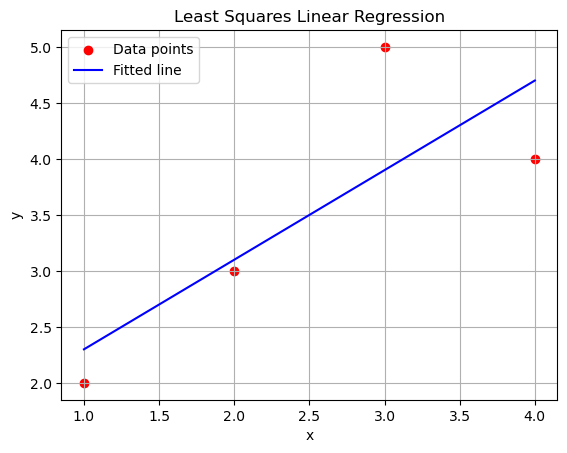

In [14]:
# Plotting the results
plt.scatter(x, y, color='red', label='Data points')  # Original data points
plt.plot(x, y_pred, color='blue', label='Fitted line')  # Fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# "A little linear algebra"

When they say "a little linear algebra," they’re referring to the use of fundamental concepts from linear algebra to solve the least squares problem analytically. In the case of fitting linear equations, this involves solving a system of linear equations to find the optimal parameters.

### Example in This Case:

In the context of linear regression, the least squares method can be solved analytically using linear algebra. Here's a step-by-step explanation of how linear algebra is used:

1. **Matrix Representation:**

   The problem can be expressed in matrix form. For a linear model \( y = a \times x + b \), we can rewrite this as:

   \[
   \mathbf{y} = \mathbf{X} \cdot \mathbf{w}
   \]

   Where:
   - \(\mathbf{y}\) is the vector of observed outputs.
   - \(\mathbf{X}\) is the design matrix (including a column for the intercept).
   - \(\mathbf{w}\) is the vector of parameters \([a, b]^T\).

   For our example:
   \[
   \mathbf{X} = \begin{bmatrix}
   1 & 1 \\
   2 & 1 \\
   3 & 1 \\
   4 & 1 \\
   \end{bmatrix}
   \]
   \[
   \mathbf{w} = \begin{bmatrix}
   a \\
   b \\
   \end{bmatrix}
   \]
   \[
   \mathbf{y} = \begin{bmatrix}
   2 \\
   3 \\
   5 \\
   4 \\
   \end{bmatrix}
   \]

2. **Normal Equation:**

   To find the parameters \( \mathbf{w} \) that minimize the squared errors, we use the normal equation in linear algebra:

   \[
   \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
   \]

   Where:
   - \(\mathbf{X}^T\) is the transpose of \(\mathbf{X}\).
   - \((\mathbf{X}^T \mathbf{X})^{-1}\) is the inverse of the matrix \(\mathbf{X}^T \mathbf{X}\).

3. **Computing the Parameters:**

   - Compute \(\mathbf{X}^T \mathbf{X}\) (the matrix multiplication of \(\mathbf{X}^T\) and \(\mathbf{X}\)).
   - Compute the inverse of the result.
   - Multiply this inverse by \(\mathbf{X}^T\) and then by \(\mathbf{y}\) to get the parameter vector \(\mathbf{w}\).

   Here’s how you would compute it in Python using `numpy`:

In [7]:
import numpy as np

# Design matrix X
X = np.array([[1, 1],
[2, 1],
[3, 1],
[4, 1]])

# Response vector y
y = np.array([2, 3, 5, 4])

# Compute parameters using the normal equation
X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_y = X_transpose @ y
w = X_transpose_X_inv @ X_transpose_y

a, b = w
print(f"Fitted parameters:\n a (slope) = {a}\n b (intercept) = {b}")

Fitted parameters:
 a (slope) = 0.7999999999999989
 b (intercept) = 1.5



### Summary

- **Linear Algebra Concepts:** Matrix multiplication, transposition, inversion.
- **Normal Equation:** A method to compute the best parameters analytically.
- **Python Code:** Uses `numpy` to perform matrix operations and solve for the optimal parameters.

By solving this normal equation, we obtain the parameters \(a\) and \(b\) that minimize the squared differences between the predicted and actual values. This is the "little linear algebra" used to fit linear models.

# Understanding why it's called "least squares"?

The term "least squares" refers to the goal of the method: minimizing the sum of the squared differences between the observed values and the values predicted by the model. Let me break it down further:

### Why "Least Squares"?

1. **Squared Differences:**
   - When fitting a model to data, the difference between the observed value and the predicted value is called the **error**.
   - To ensure that positive and negative errors do not cancel each other out, and to emphasize larger errors more, we square each error. Squaring makes all errors positive and gives more weight to larger errors.

2. **Minimizing the Sum:**
   - The goal is to find the model parameters that minimize the **sum** of these squared errors. This is why it's called **"least squares"**: we want to find the parameters that result in the smallest possible sum of squared errors.

### Example

Consider the following data points and a simple model \( y = a \times x + b \):

- **Data Points:**
  \[
  \begin{array}{ccc}
  x & \text{Observed } y \\
  1 & 2 \\
  2 & 3 \\
  3 & 5 \\
  4 & 4 \\
  \end{array}
  \]

- **Model Prediction:**
  \[
  y_{\text{pred}} = a \times x + b
  \]

For each \( x \), we calculate the predicted \( y \) and compute the error (difference between observed and predicted values). 

- **Errors:**
  \[
  \text{Error} = y_{\text{actual}} - y_{\text{pred}}
  \]

- **Squared Errors:**
  \[
  \text{Squared Error} = (\text{Error})^2
  \]

- **Sum of Squared Errors:**
  \[
  \text{Total Squared Error} = \sum (\text{Squared Error})
  \]

### Why Minimize?

By minimizing the sum of the squared errors, we are essentially finding the parameter values that make our model’s predictions as close as possible to the actual observed values. 

### Summary

- **"Least Squares"** refers to the objective of minimizing the sum of the squared differences (errors) between observed and predicted values.
- The term captures the idea of reducing these errors to their smallest possible sum, ensuring the best fit for the model.

# A non-linear equation

## Adding Complex Functions to Models

When we add different mathematical functions (like sine or cosine) to our equation, it becomes more complex. For example, an equation might look like this:

\[ y = a $\cdot$  sin(b $\cdot$  x) + c \]

In this equation:
- **\( a \)** and **\( b \)** are parameters that we adjust.
- **\(\sin\)** is a sine function that changes the shape of our model.

### What Happens When We Add These Functions?

- **Analytical Calculation:** When the equation is simple (like a straight line), we can find the best parameters using straightforward math.
- **Nonlinear Functions:** When we add complex functions, like sine or cosine, finding the best parameters isn’t straightforward. The math becomes more complex and usually requires a different approach.

### Nonlinear Least Squares

- **Iterative Optimization:** Instead of using simple calculations, we use methods that guess and improve the parameters step by step until we get the best fit.
- **Nonlinear:** The problem is called nonlinear because the function we’re fitting is not a straight line and is harder to solve.

In short, when adding complex functions to our model, we often need to use more advanced methods to find the best parameters.


# Curve Fitting Python API

# Curve Fitting Worked Example

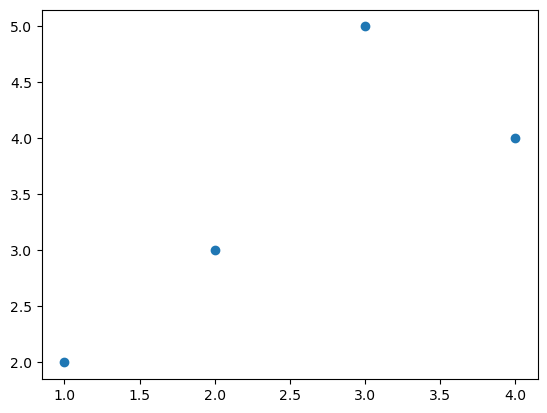

In [31]:
# plot "Population" vs "Employed"
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]


# Data points
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 5, 4])


# plot input vs output
pyplot.scatter(x, y)
pyplot.show()

In [32]:
def objective(x, a, b):
        return a * x + b

In [33]:
from scipy.optimize import curve_fit

In [34]:
popt, _ = curve_fit(objective, x, y)

In [35]:
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.80000 * x + 1.50000


In [36]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [44]:
# Define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
x_line = x

In [45]:

# calculate the output for the range
y_line = objective(x_line, a, b)
y_line

array([2.3, 3.1, 3.9, 4.7])

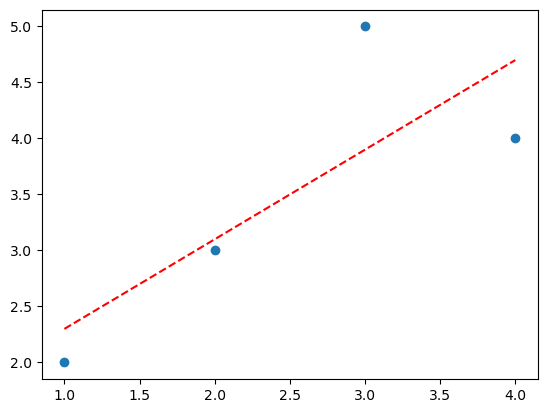

In [46]:
# create a line plot for the mapping function
# plot input vs output
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')

# Adding polynomials in our Objective function

In [47]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

In [48]:
# curve fit
popt, _ = curve_fit(objective, x, y)

In [49]:
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 3.30000 * x + -0.50000 * x^2 + -1.00000


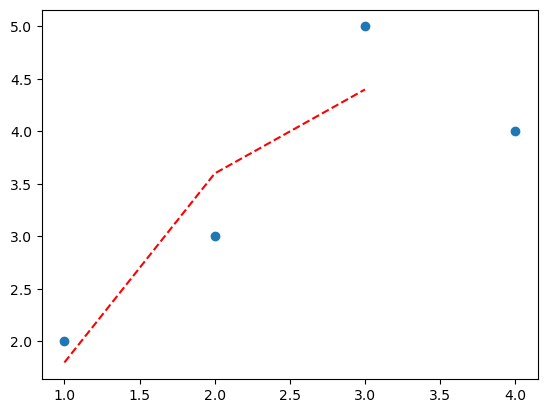

In [50]:
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

# Adding a fifth degree Polynomial

In [55]:
# define the true objective function
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

In [52]:
# curve fit
popt, _ = curve_fit(objective, x, y)

TypeError: The number of func parameters=6 must not exceed the number of data points=4

In [53]:
# summarize the parameter values
a, b, c, d, e, f = popt

ValueError: not enough values to unpack (expected 6, got 3)

NameError: name 'd' is not defined

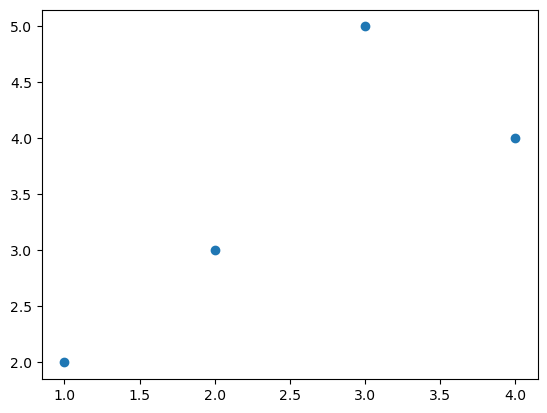

In [54]:
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

# Adding a Sin function

In [30]:
from numpy import sin

In [29]:
# define the true objective function
def objective(x, a, b, c, d):
	return a * sin(b - x) + c * x**2 + d

In [31]:
# curve fit
popt, _ = curve_fit(objective, x, y)

In [32]:
# summarize the parameter values
a, b, c, d = popt
print(popt)

[8.83095063e-01 1.48622919e+00 2.05997112e-03 3.69046173e+01]


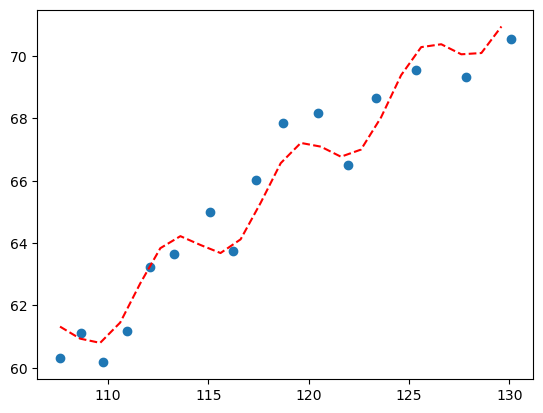

In [33]:
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()